## Mini Project on Employees Data Using PySpark

## Dataset : crime_dataset_india



In [1]:
sc


<SparkContext master=local[*] appName=PySparkShell>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("crime_dataset_india.csv")
df.head(10)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1.0,02-01-2020 0.00,01-01-2020 0.00,01-01-2020 1.11,Ahmedabad,576.0,IDENTITY THEFT,16.0,M,Blunt Object,Violent Crime,13.0,No,NaN
1,2.0,01-01-2020 19.00,01-01-2020 1.00,01-01-2020 6.26,Chennai,128.0,HOMICIDE,37.0,M,Poison,Other Crime,9.0,No,NaN
2,3.0,02-01-2020 5.00,01-01-2020 2.00,01-01-2020 14.30,Ludhiana,271.0,KIDNAPPING,48.0,F,Blunt Object,Other Crime,15.0,No,NaN
3,4.0,01-01-2020 5.00,01-01-2020 3.00,01-01-2020 14.46,Pune,170.0,BURGLARY,49.0,F,Firearm,Other Crime,1.0,Yes,29-04-2020 5.00
4,5.0,01-01-2020 21.00,01-01-2020 4.00,01-01-2020 16.51,Pune,421.0,VANDALISM,30.0,F,Other,Other Crime,18.0,Yes,08-01-2020 21.00
5,6.0,02-01-2020 3.00,01-01-2020 5.00,01-01-2020 17.09,Delhi,442.0,ASSAULT,16.0,M,Firearm,Violent Crime,18.0,Yes,30-03-2020 3.00
6,7.0,01-01-2020 16.00,01-01-2020 6.00,01-01-2020 14.08,Chennai,172.0,VEHICLE - STOLEN,64.0,F,Knife,Violent Crime,13.0,Yes,24-03-2020 16.00
7,8.0,02-01-2020 10.00,01-01-2020 7.00,02-01-2020 6.33,Chennai,169.0,COUNTERFEITING,78.0,X,Knife,Other Crime,8.0,No,NaN
8,9.0,04-01-2020 3.00,01-01-2020 8.00,02-01-2020 6.34,Mumbai,338.0,EXTORTION,41.0,X,Blunt Object,Other Crime,1.0,No,NaN
9,10.0,03-01-2020 7.00,01-01-2020 9.00,01-01-2020 17.50,Chennai,497.0,PUBLIC INTOXICATION,29.0,M,Knife,Other Crime,4.0,No,NaN


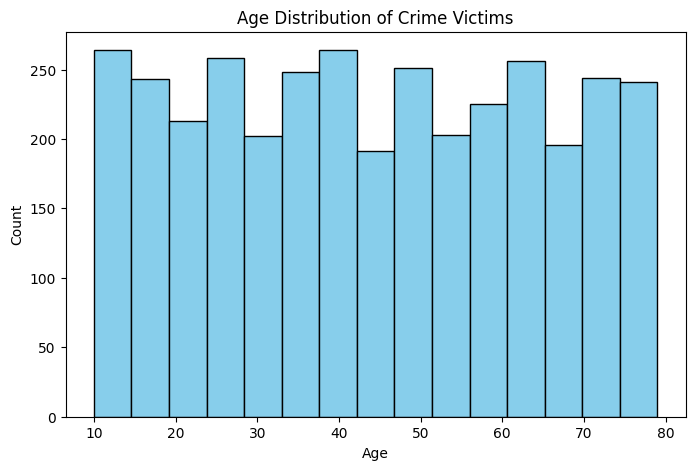

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Victim Age'], bins=15, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Crime Victims")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


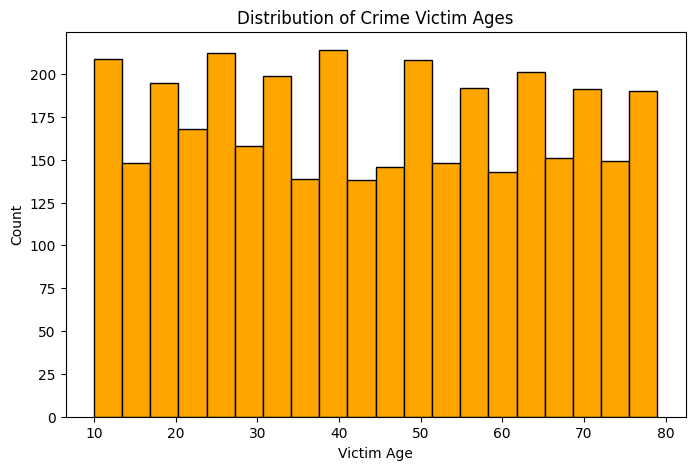

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Victim Age'], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Crime Victim Ages")
plt.xlabel("Victim Age")
plt.ylabel("Count")
plt.show()


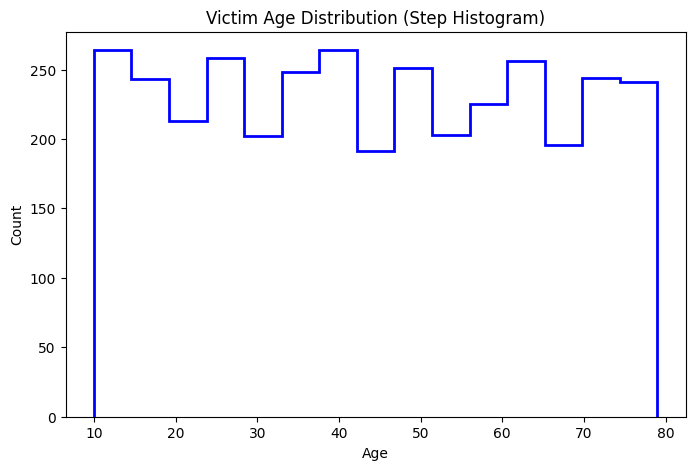

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Victim Age'], bins=15, color="blue", histtype="step", linewidth=2)
plt.title("Victim Age Distribution (Step Histogram)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


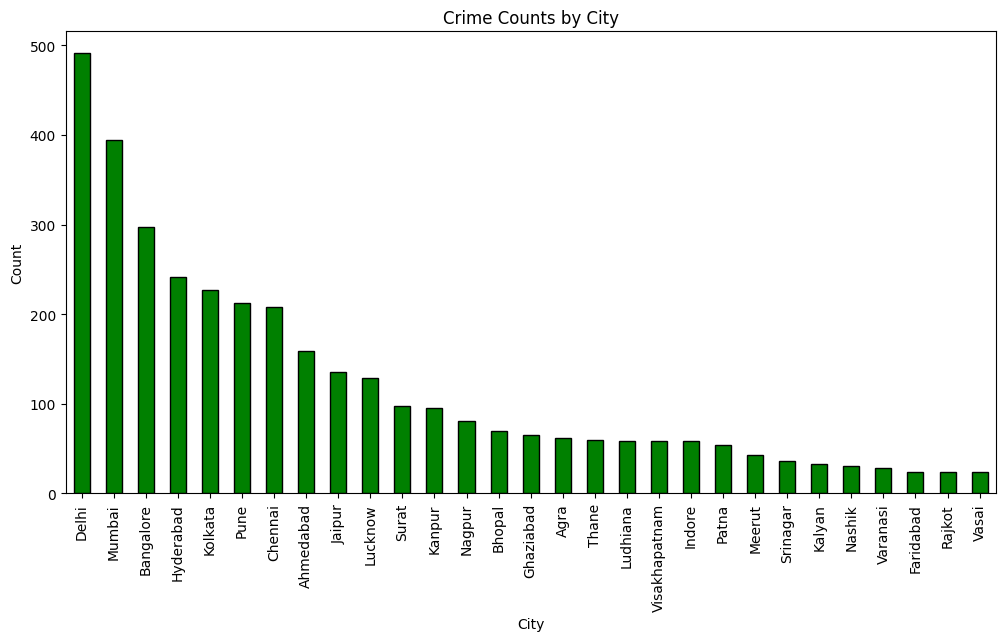

In [34]:
import matplotlib.pyplot as plt

# Group by City and get counts
city_counts = df.groupby("City").size().sort_values(ascending=False)

plt.figure(figsize=(12,6))
city_counts.plot(kind='bar', color='green', edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.title("Crime Counts by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


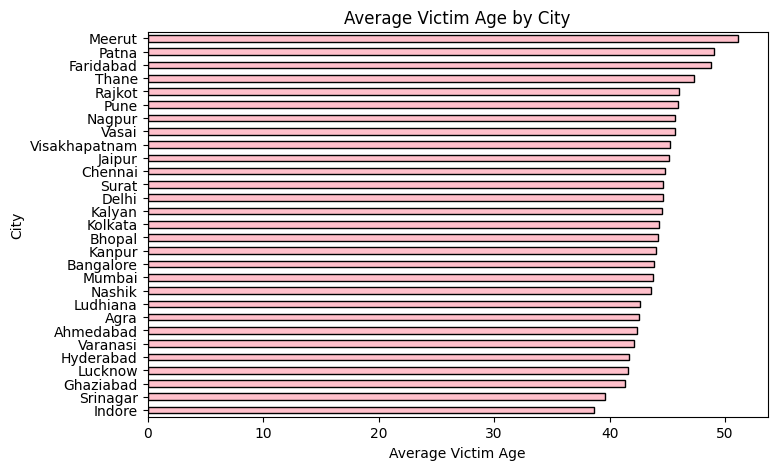

In [36]:
import matplotlib.pyplot as plt

# Calculate average victim age by city
avg_age = df.groupby("City")["Victim Age"].mean().sort_values()

plt.figure(figsize=(8,5))
avg_age.plot(kind="barh", color="pink", edgecolor="black")
plt.title("Average Victim Age by City")
plt.xlabel("Average Victim Age")
plt.ylabel("City")
plt.show()


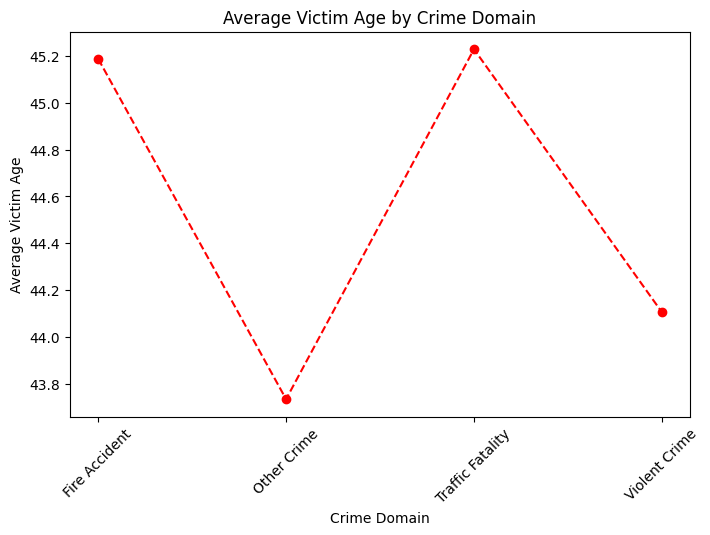

In [37]:
import matplotlib.pyplot as plt

# Calculate average victim age by Crime Domain
avg_age_by_domain = df.groupby("Crime Domain")["Victim Age"].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_age_by_domain.index, avg_age_by_domain.values, marker="o", linestyle="--", color="red")
plt.title("Average Victim Age by Crime Domain")
plt.xlabel("Crime Domain")
plt.ylabel("Average Victim Age")
plt.xticks(rotation=45)
plt.show()


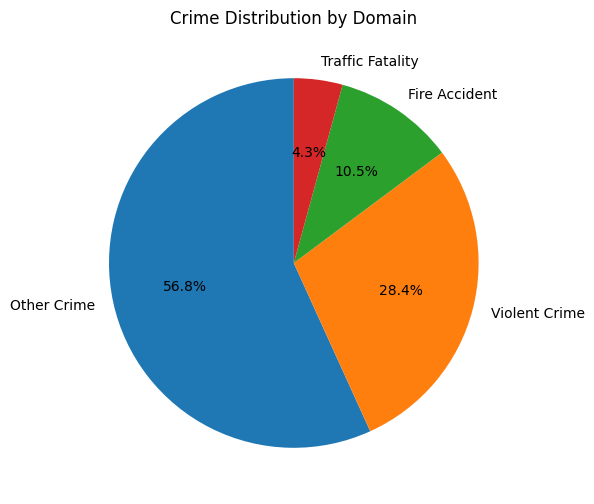

In [38]:
import matplotlib.pyplot as plt

# Count crimes by Crime Domain
crime_domain_counts = df['Crime Domain'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(crime_domain_counts, labels=crime_domain_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Crime Distribution by Domain")
plt.show()


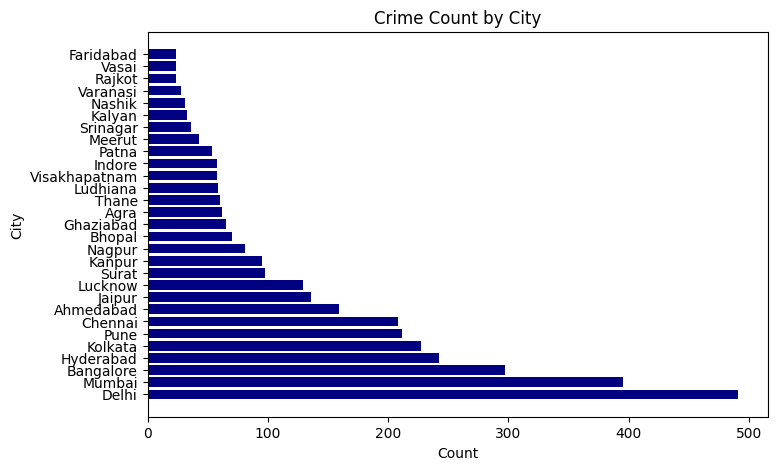

In [39]:
import matplotlib.pyplot as plt

# Count crimes by City
city_count = df["City"].value_counts()

plt.figure(figsize=(8,5))
plt.barh(city_count.index, city_count.values, color="navy")
plt.title("Crime Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


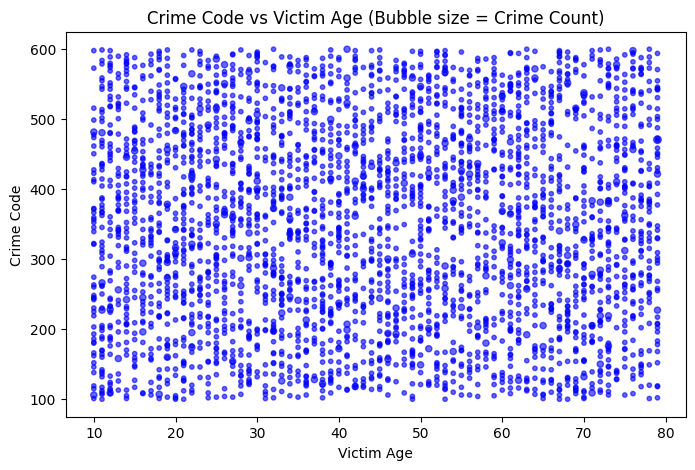

In [42]:
import matplotlib.pyplot as plt

# Group by Victim Age and Crime Code (numeric assumed) and count the occurrences
age_code_counts = df.groupby(['Victim Age', 'Crime Code']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
plt.scatter(age_code_counts['Victim Age'], age_code_counts['Crime Code'], 
            s=age_code_counts['count'] * 10, alpha=0.6, c='blue')
plt.title("Crime Code vs Victim Age (Bubble size = Crime Count)")
plt.xlabel("Victim Age")
plt.ylabel("Crime Code")
plt.show()


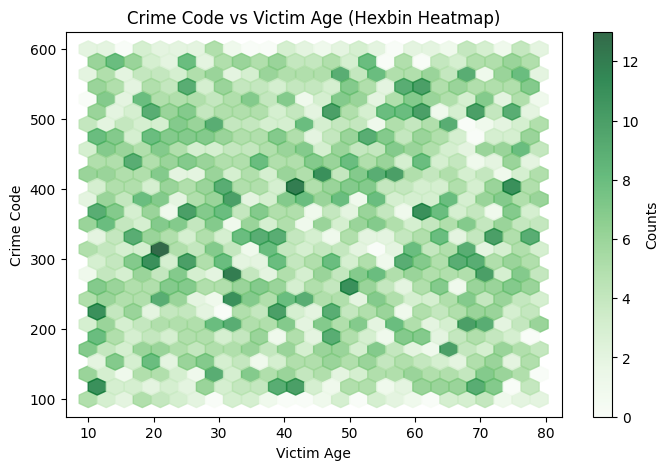

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hexbin(df['Victim Age'], df['Crime Code'], gridsize=25, cmap="Greens", alpha=0.8)
plt.colorbar(label="Counts")
plt.title("Crime Code vs Victim Age (Hexbin Heatmap)")
plt.xlabel("Victim Age")
plt.ylabel("Crime Code")
plt.show()


<Figure size 1000x600 with 0 Axes>

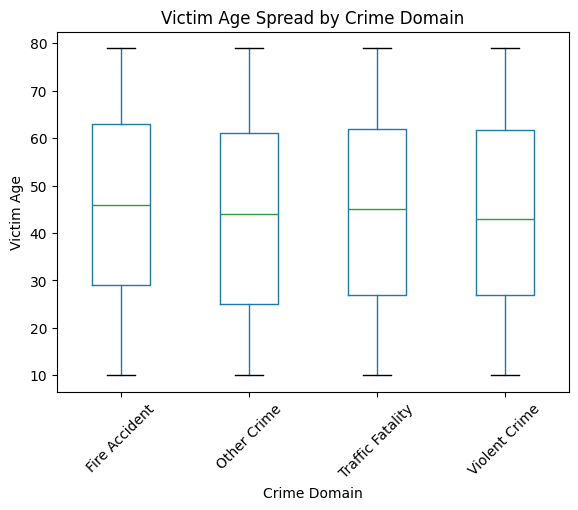

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.boxplot(column="Victim Age", by="Crime Domain", grid=False, showfliers=False)
plt.title("Victim Age Spread by Crime Domain")
plt.suptitle("")  # remove default title
plt.xlabel("Crime Domain")
plt.ylabel("Victim Age")
plt.xticks(rotation=45)
plt.show()


In [46]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, count

# Start Spark session with local master
spark = SparkSession.builder.master("local[*]").appName("CrimeDataAnalysis").getOrCreate()


# Read the crime dataset CSV file
df = spark.read.option("header", True).option("inferSchema", True).csv("crime_dataset_india.csv")

# Show schema
df.printSchema()

# Count total records
print(f"Total records: {df.count()}")

# Show first few rows
df.show(5)


ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it